<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [70]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
breast_cancer_csv = r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\breast-cancer-wisconsin-data.csv"

In [3]:
breast_cancer = pd.read_csv(breast_cancer_csv, index_col ='id')

In [4]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
breast_cancer = breast_cancer.drop('Unnamed: 32', axis=1)

In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [8]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
breast_cancer['diagnosis'].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

In [23]:
breast_cancer_corr = breast_cancer.corr(numeric_only=True)

In [24]:
columns = np.full((breast_cancer_corr.shape[0],), True, dtype=bool)

In [29]:
columns

array([ True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True])

In [43]:
for i in range(breast_cancer_corr.shape[0]):
    for j in range(i+1, breast_cancer_corr.shape[0]):
        if breast_cancer_corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = breast_cancer_corr.columns[columns]

selected_columns.insert(0, 'diagnosis')
breast_cancer_updated = breast_cancer[selected_columns]

In [44]:
selected_columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'texture_se',
       'smoothness_se', 'symmetry_se'],
      dtype='object')

In [45]:
breast_cancer_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      569 non-null    float64
 1   texture_mean     569 non-null    float64
 2   smoothness_mean  569 non-null    float64
 3   texture_se       569 non-null    float64
 4   smoothness_se    569 non-null    float64
 5   symmetry_se      569 non-null    float64
dtypes: float64(6)
memory usage: 31.1 KB


In [46]:
breast_cancer_final = breast_cancer_updated.join(breast_cancer.diagnosis, how='left')

In [47]:
breast_cancer_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      569 non-null    float64
 1   texture_mean     569 non-null    float64
 2   smoothness_mean  569 non-null    float64
 3   texture_se       569 non-null    float64
 4   smoothness_se    569 non-null    float64
 5   symmetry_se      569 non-null    float64
 6   diagnosis        569 non-null    object 
dtypes: float64(6), object(1)
memory usage: 51.7+ KB


In [48]:
breast_cancer_final.head()

,radius_mean,texture_mean,smoothness_mean,texture_se,smoothness_se,symmetry_se,diagnosis
id,,,,,,,
842302,17.99,10.38,0.11840,0.9053,0.006399,0.03003,M
842517,20.57,17.77,0.08474,0.7339,0.005225,0.01389,M
84300903,19.69,21.25,0.10960,0.7869,0.006150,0.02250,M
84348301,11.42,20.38,0.14250,1.1560,0.009110,0.05963,M
84358402,20.29,14.34,0.10030,0.7813,0.011490,0.01756,M


I ran above a loop to find the correlation between the different features and took out the columns with correlations higher than 0.8.

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [57]:
# ANSWER
y = breast_cancer_final['diagnosis']

### 4. What is the baseline accuracy?

In [58]:
# ANSWER
y.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [59]:
# ANSWER
feature_columns = [c for c in breast_cancer_final.columns if c != 'diagnosis']

In [60]:
feature_columns

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'texture_se',
 'smoothness_se',
 'symmetry_se']

In [61]:
X = breast_cancer_final[feature_columns]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [62]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [63]:
# ANSWER
# predict the response values for the observations in X ("test the model")

y_pred_class = knn.predict(X)

# store the predicted response values

print(metrics.accuracy_score(y, y_pred_class))

1.0


### ANSWER

It is better than the baseline however it is not legitimate as we need to split the data for testing and training and cross validate to make sure we have an accurate model. If a model sess the entire set of data it will simply always have accurate predictions.

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [64]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8070175438596491


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [67]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k = X_train.shape[0]
# Fit Train Data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test.values)
# Print accuracy_score
print(metrics.accuracy_score(y_test, y_pred_class))

0.6228070175438597


C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

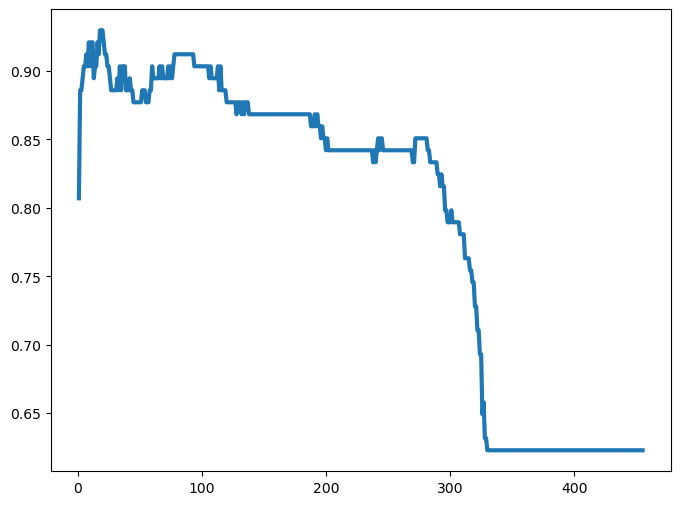

In [71]:
# ANSWER
test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test.values, y_test))

# plot test accuracy by number of neighbors:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [72]:
# ANSWER

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

print(max(test_acc))

0.9051234280391244


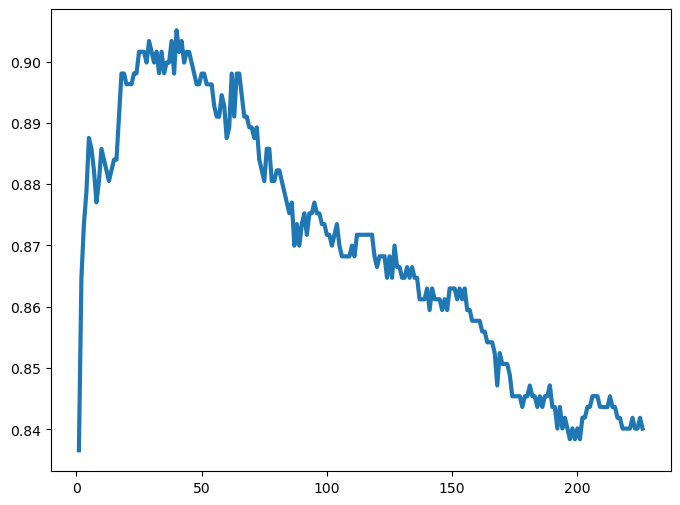

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [74]:
# ANSWER
# Standarize X
ss = StandardScaler()
Xs = ss.fit_transform(X)

test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

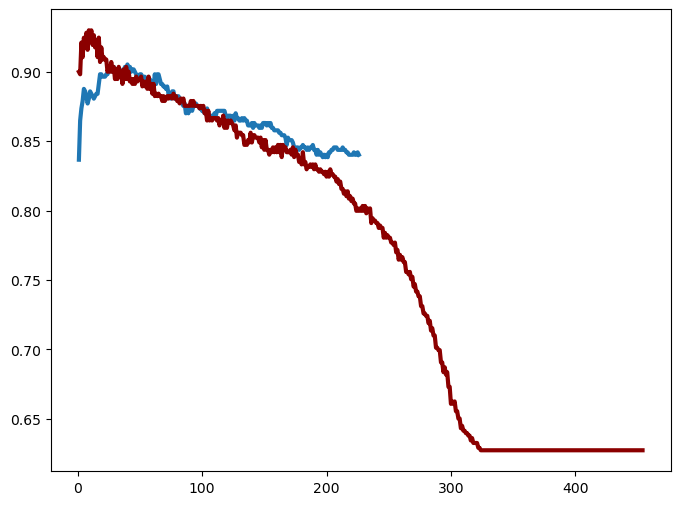

In [75]:
# ANSWER
# plot test accuracy by number of neighbors:

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



